In [1]:
import os
import argparse
import datetime
import re
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
import shapely
import dask.array as da
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import rasterio.plot

In [2]:
from osgeo import ogr, osr, gdal, gdal_array
from rasterio.crs import CRS
from rasterio.warp import reproject, Resampling
from rasterio.features import bounds
from dateutil.relativedelta import *
from satsearch import Search
from datetime import datetime, timedelta
from pyproj import Transformer
from json import load
from satstac import Catalog, Collection, Item
from sklearn import cluster

In [ ]:
# do this in terminal before running the jupyter lab server or in .bashrc
# export STAC_API_URL="https://earth-search.aws.element84.com/v0"

In [15]:
import rasterio.plot
import geopandas
file_path = "./main_pipeline/input_geometries/doberitz_multipolygon.geojson"
input_geometry = geopandas.read_file(file_path)

for subdir, dirs, files in os.walk("./sentinel_data/NDVI_SEL/"):
    for filename in files:
        filepath = subdir + os.sep + filename
        if ".tif" in filepath:
            with rasterio.open(filepath, 'r') as raster:
                coord_transformer = Transformer.from_crs("epsg:4326", raster.crs) 
                input_geometry_proj = input_geometry.to_crs(raster.crs)
                # arr = raster.read() 
                # fig, ax = plt.subplots(figsize=(15, 15))
                # image_hidden = ax.imshow(arr[0], cmap="seismic")
                # fig.colorbar(image_hidden, ax=ax)
                # plt.title(filename, fontdict=None, loc='center')
                # input_geometry_proj.plot(ax=ax, facecolor='none', edgecolor='black')    
                # rasterio.plot.show(raster, ax=ax, cmap="seismic")                


In [16]:
img_test = gdal.Open('./sentinel_data/NDVI/S2A_32UQD_20210602_0_L2A__NDVI.tif', gdal.GA_ReadOnly)
Y = []
for subdir, dirs, files in os.walk("./sentinel_data/NDVI_SEL/"):
    for filename in files:
        filepath = subdir + os.sep + filename
        if ".tif" in filepath and "32UQD" in filepath:
            img_ds = gdal.Open(filepath, gdal.GA_ReadOnly)
            band = img_ds.GetRasterBand(1)
            img = band.ReadAsArray()
            X = img.reshape((-1,1))
            Y.append(X)
img_stack = np.stack(Y, axis=2)
img_stack_reshaped = img_stack[:, :, :].reshape((img_stack.shape[0], img_stack.shape[2]))

In [17]:
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(img_stack_reshaped)
X_cluster = k_means.labels_
X_cluster = X_cluster.reshape(img.shape)

In [18]:
band = img_test.GetRasterBand(1)
arr = band.ReadAsArray()
[cols, rows] = arr.shape
format = "GTiff"
driver = gdal.GetDriverByName(format)
outDataRaster = driver.Create("./sentinel_data/LandCover/S2A_32UQD_L2A__LC_3.tif", rows, cols, 1, gdal.GDT_Byte)
outDataRaster.SetGeoTransform(img_test.GetGeoTransform())
outDataRaster.SetProjection(img_test.GetProjection())
outDataRaster.GetRasterBand(1).WriteArray(X_cluster)
outDataRaster.FlushCache()
del outDataRaster

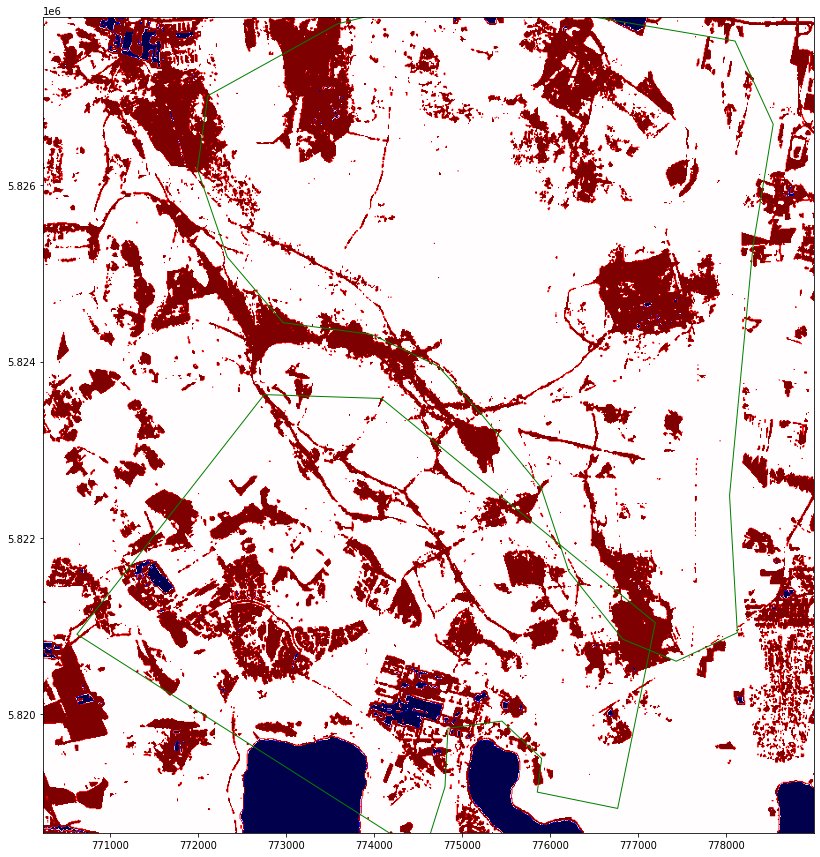

In [21]:
file_path = "./main_pipeline/input_geometries/doberitz_multipolygon.geojson"
input_geometry = gpd.read_file(file_path)
with rasterio.open("./sentinel_data/LandCover/S2A_32UQD_L2A__LC_3.tif", 'r') as raster:
    coord_transformer = Transformer.from_crs("epsg:4326", raster.crs) 
    input_geometry_proj = input_geometry.to_crs(raster.crs)
    fig, ax = plt.subplots(figsize=(15, 15))
    input_geometry_proj.plot(ax=ax, facecolor='none', edgecolor='green')    
    rasterio.plot.show(raster, ax=ax, cmap="seismic")      

In [23]:
img_test = gdal.Open('./sentinel_data/NDVI/S2A_33UUU_20210602_0_L2A__NDVI.tif', gdal.GA_ReadOnly)
Y = []
for subdir, dirs, files in os.walk("./sentinel_data/NDVI_SEL/"):
    for filename in files:
        filepath = subdir + os.sep + filename
        if ".tif" in filepath and "33UUU" in filepath:
            img_ds = gdal.Open(filepath, gdal.GA_ReadOnly)
            band = img_ds.GetRasterBand(1)
            img = band.ReadAsArray()
            X = img.reshape((-1,1))
            Y.append(X)
img_stack = np.stack(Y, axis=2)
img_stack_reshaped = img_stack[:, :, :].reshape((img_stack.shape[0], img_stack.shape[2]))

In [24]:
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(img_stack_reshaped)
X_cluster = k_means.labels_
X_cluster = X_cluster.reshape(img.shape)

In [25]:
band = img_test.GetRasterBand(1)
arr = band.ReadAsArray()
[cols, rows] = arr.shape
format = "GTiff"
driver = gdal.GetDriverByName(format)
outDataRaster = driver.Create("./sentinel_data/LandCover/S2A_33UUU_L2A__LC_3.tif", rows, cols, 1, gdal.GDT_Byte)
outDataRaster.SetGeoTransform(img_test.GetGeoTransform())
outDataRaster.SetProjection(img_test.GetProjection())
outDataRaster.GetRasterBand(1).WriteArray(X_cluster)
outDataRaster.FlushCache()
del outDataRaster

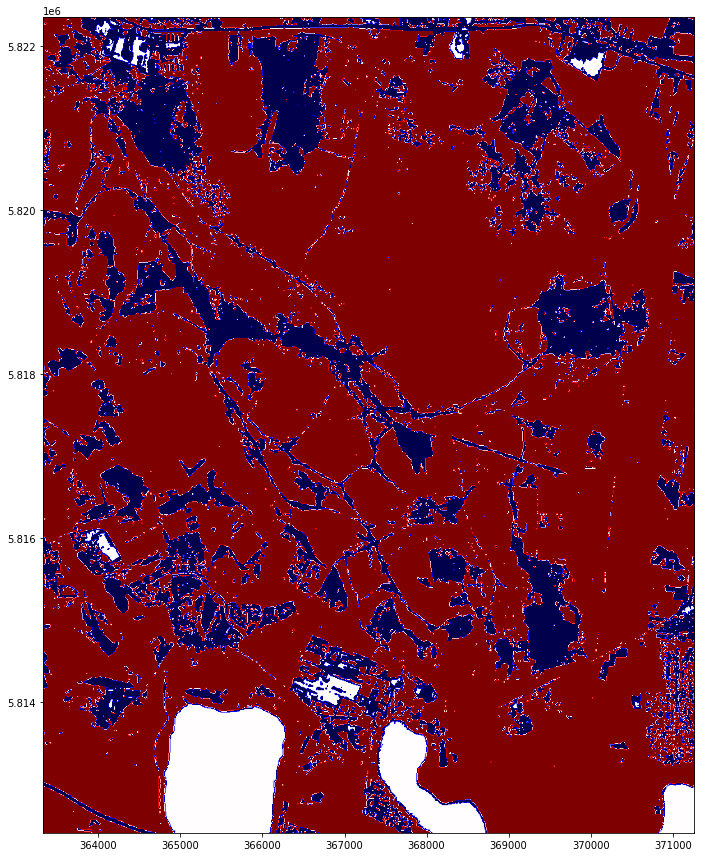

In [26]:
with rasterio.open("./sentinel_data/LandCover/S2A_33UUU_L2A__LC_3.tif", 'r') as raster:
    fig, ax = plt.subplots(figsize=(15, 15))
    rasterio.plot.show(raster, ax=ax, cmap="seismic")    